In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [35]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/Images',batch_size=1,image_size=(100,100))

Found 310 files belonging to 2 classes.


In [36]:
image_0 = np.concatenate([image for image,label in dataset][0].numpy().astype('int'))

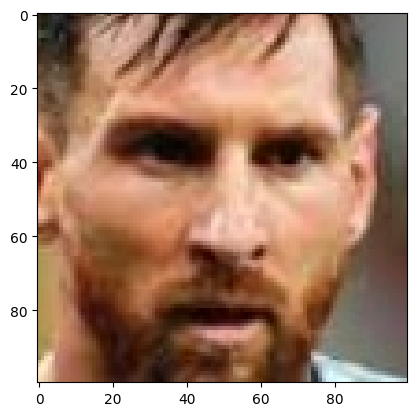

In [37]:
plt.imshow(image_0)

In [38]:
train_ds = dataset.take(250)
test_ds = dataset.skip(250)
val_ds = test_ds.take(30)
test_ds = test_ds.skip(30)
(len(train_ds),len(val_ds),len(test_ds))

(250, 30, 30)

In [39]:
train_images, train_labels = [], []

for image_batch, label_batch in train_ds:
    train_images.append(image_batch.numpy())
    train_labels.append(label_batch.numpy())

train_images = np.concatenate(train_images, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

In [40]:
val_images, val_labels = [], []

for image_batch, label_batch in val_ds:
    val_images.append(image_batch.numpy())
    val_labels.append(label_batch.numpy())

val_images = np.concatenate(val_images, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

In [41]:
test_images, test_labels = [], []

for image_batch, label_batch in test_ds:
    test_images.append(image_batch.numpy())
    test_labels.append(label_batch.numpy())

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(100,100,3)))
model.add(tf.keras.layers.Conv2D(filters=150,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=70,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

r=model.fit(x=train_images/255,y=train_labels,epochs=20,validation_data=(val_images/255,val_labels))

Epoch 1/20
8/8 [==============================] - 4s 81ms/step - loss: 0.6878 - accuracy: 0.5480 - val_loss: 0.6748 - val_accuracy: 0.6000
Epoch 2/20
8/8 [==============================] - 0s 37ms/step - loss: 0.6726 - accuracy: 0.5840 - val_loss: 0.6729 - val_accuracy: 0.6000
Epoch 3/20
8/8 [==============================] - 0s 37ms/step - loss: 0.6859 - accuracy: 0.5640 - val_loss: 0.6795 - val_accuracy: 0.6000
Epoch 4/20
8/8 [==============================] - 0s 37ms/step - loss: 0.6783 - accuracy: 0.5600 - val_loss: 0.6637 - val_accuracy: 0.6000
Epoch 5/20
8/8 [==============================] - 0s 34ms/step - loss: 0.6711 - accuracy: 0.5680 - val_loss: 0.6480 - val_accuracy: 0.6000
Epoch 6/20
8/8 [==============================] - 0s 31ms/step - loss: 0.6677 - accuracy: 0.6000 - val_loss: 0.6458 - val_accuracy: 0.6000
Epoch 7/20
8/8 [==============================] - 0s 32ms/step - loss: 0.6501 - accuracy: 0.5880 - val_loss: 0.6267 - val_accuracy: 0.6000
Epoch 8/20
8/8 [===========

In [46]:
model.evaluate(test_images/255,test_labels)

1/1 [==============================] - 0s 34ms/step - loss: 0.3419 - accuracy: 0.8333


[0.3418775200843811, 0.8333333134651184]

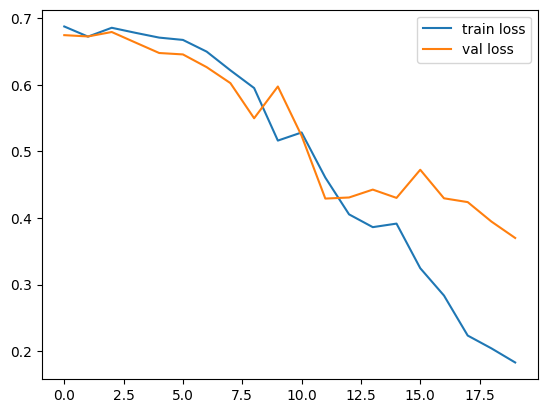

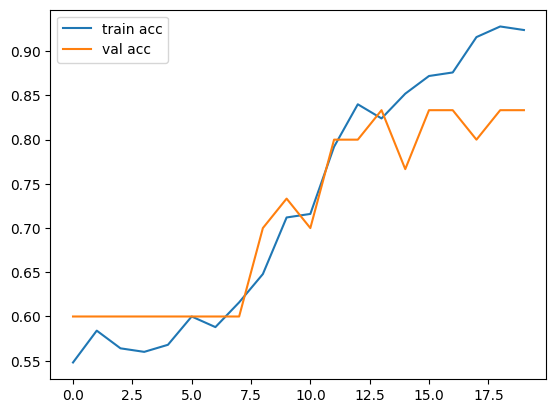

In [47]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [31]:
model.save('MessiIdentifierModel.keras')

In [2]:
from tensorflow.keras.models import load_model

In [4]:
model = load_model('MessiIdentifierModel.h5')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 150)       4200      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 70)        94570     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 70)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 50)        31550     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 10, 50)       

In [102]:
image  = cv2.imread('Images/0_CroppedOtherFaces/Kohli14.jpg')

In [103]:
image=image/255

In [104]:
image = np.expand_dims(image,axis=0)

In [105]:
print(model.predict(image),round(model.predict(image)[0][0]))

1/1 [==============================] - 0s 20ms/step
[[0.07414833]] 0
